In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from astropy.io import ascii
from astropy.table import Table, Column, join, vstack
from astropy.time import Time
import astropy.units as u
import astropy.constants as const

import astrotools.generateExoplanetTable as genTab
import astrotools.orbitparams as orb

In [2]:
HotRocksStarNames = [['GJ 3473',   0],
                     ['GJ 357',    0],
                     ['HD 260655', 0],
                     ['L 98-59',   1],
                     ['LHS 1140',  1],
                     ['LHS 1478',  0],
                     ['LTT 3780',  0],
                     ['TOI-1468',  0],
                     ['TOI-270',   0]]

In [3]:
try:
    HotRocksSystems = ascii.read('HotRocksSystems.dat')
    HotRocksTargets = ascii.read('HotRocksTargets.dat')
except:
    HotRocksSystems = []
    HotRocksTargets = []
    for star in HotRocksStarNames:
        system = genTab.generateExoSystem(hostname = star[0])
        HotRocksSystems.append(system)
        HotRocksTargets.append(system[star[1]])
    HotRocksSystems = vstack(HotRocksSystems)
    HotRocksTargets = vstack(HotRocksTargets)

    ascii.write(HotRocksSystems, 'HotRocksSystems.dat')
    ascii.write(HotRocksTargets, 'HotRocksTargets.dat')

Accessing NASA Exoplanet Archive
Table of transiting exoplanets retrieved
Writing table to ./NASAExoArchive_TransitingExoplanetSystem_GJ3473.dat
Accessing NASA Exoplanet Archive
Table of transiting exoplanets retrieved
Writing table to ./NASAExoArchive_TransitingExoplanetSystem_GJ357.dat
Accessing NASA Exoplanet Archive
Table of transiting exoplanets retrieved
Writing table to ./NASAExoArchive_TransitingExoplanetSystem_HD260655.dat
Accessing NASA Exoplanet Archive
Table of transiting exoplanets retrieved
Writing table to ./NASAExoArchive_TransitingExoplanetSystem_L98-59.dat
Accessing NASA Exoplanet Archive
Table of transiting exoplanets retrieved
Writing table to ./NASAExoArchive_TransitingExoplanetSystem_LHS1140.dat
Accessing NASA Exoplanet Archive
Table of transiting exoplanets retrieved
Writing table to ./NASAExoArchive_TransitingExoplanetSystem_LHS1478.dat
Accessing NASA Exoplanet Archive
Table of transiting exoplanets retrieved
Writing table to ./NASAExoArchive_TransitingExoplanet

In [4]:
nplanets = len(HotRocksTargets)

Teq = orb.Teq(np.array(HotRocksTargets['st_teff'])*u.K, 0, HotRocksTargets['pl_ratdor']).to(u.K)
g_p = ((const.G*np.array(HotRocksTargets['pl_bmasse'])*u.M_earth) / (np.array(HotRocksTargets['pl_rade'])*u.R_earth)**2).to(u.m/u.s**2)
S = orb.instellation(Teff=np.array(HotRocksTargets['st_teff'])*u.K, Teff_unc=np.array([0 for i in range(nplanets)])*u.K, Rs=np.array(HotRocksTargets['st_rad'])*u.R_sun, Rs_unc=np.array([0 for i in range(nplanets)])*u.R_sun, a=np.array(HotRocksTargets['pl_orbsmax'])*u.AU, a_unc=np.array([0 for i in range(nplanets)])*u.AU)[0]

c = Column(g_p, name='pl_g')
HotRocksTargets.add_column(c)
c = Column(Teq, name='pl_teq_a0')
HotRocksTargets.add_column(c)
c = Column(S, name='pl_s')
HotRocksTargets.add_column(c)

In [5]:
HotRocksTargets

hostname,pl_name,sy_dist,sy_disterr1,sy_disterr2,rastr,decstr,sy_kmag,st_mass,st_masserr1,st_masserr2,st_rad,st_raderr1,st_raderr2,st_teff,st_tefferr1,st_tefferr2,st_tefferr12,st_tefferr22,st_logg,st_lum,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_rade,pl_radeerr1,pl_radeerr2,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbincl,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_ratror,pl_ratdor,tran_flag,rv_flag,pl_g,pl_teq_a0,pl_s
,,pc,pc,pc,deg,deg,mag,Msun,Msun,Msun,Rsun,Rsun,Rsun,K,K,K,K,K,log(cm/s**2),log(Lsun),day,day,day,Rearth,Rearth,Rearth,Mearth,Mearth,Mearth,day,day,day,AU,AU,AU,deg,,,,,,,,m / s2,K,
object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64
GJ 3473,GJ 3473 b,27.3644,0.0376,-0.0376,08h02m22.47s,+03d20m13.79s,8.829001,0.36,0.02,-0.02,0.36,0.01,-0.01,3347.0,54.0,-54.0,54.0,-54.0,4.81,-1.824,2458492.20408,0.00043,-0.00042,1.264,0.05,-0.049,1.86,0.3,-0.3,1.1980035,1.8e-06,-1.9e-06,0.01589,0.00062,-0.00062,87.95,0.0,--,--,0.03184,9.39,1,1,11.407064002554433,772.3389162090356,57.83231621613784
GJ 357,GJ 357 b,9.44181,0.00511,-0.00511,09h36m01.79s,-21d39m54.23s,6.475,0.34,0.01,-0.01,0.34,0.02,-0.02,3505.0,51.0,-51.0,51.0,-51.0,4.94,-1.798,2459272.6757,0.0004,-0.0004,1.2,0.06,-0.06,1.84,0.31,-0.31,3.9306,2e-06,-2e-06,0.036,0.0004,-0.0004,89.228,--,--,--,0.0309,22.89,1,1,12.520175393022097,518.0242947422512,12.086357933622619
HD 260655,HD 260655 b,10.0055,0.00505,-0.00505,06h37m09.97s,+17d33m58.57s,5.862,0.44,0.01,-0.01,0.44,0.0,-0.0,3803.0,10.0,-10.0,10.0,-10.0,5.2,-1.44,2459497.9102,0.0003,-0.0003,1.24,0.023,-0.023,2.14,0.34,-0.34,2.76953,3e-05,-3e-05,0.02933,0.00024,-0.00024,87.35,0.039,0.043,-0.023,0.02586,14.43,1,1,13.63720864077306,707.9101870907305,42.26462874810972
L 98-59,L 98-59 c,10.6194,0.0032,-0.0032,08h18m07.89s,-68d18m52.08s,7.101,0.31,0.03,-0.03,0.31,0.01,-0.01,3412.0,49.0,-49.0,49.0,-49.0,4.94,-1.948,2458367.2738,0.00025,-0.00025,1.34,0.07,-0.07,2.42,0.35,-0.34,3.6906745,2.5e-06,-2.5e-06,0.0317,0.0001,-0.0001,88.11,0.0,--,--,0.039,19.0,1,1,13.20568249247054,553.4994888981619,11.636744074778985
LHS 1140,LHS 1140 c,14.9861,0.0153,-0.0152,00h44m59.67s,-15d16m26.79s,8.821,0.18,0.0,-0.0,0.22,0.0,-0.0,3096.0,48.0,-48.0,48.0,-48.0,5.04,-2.42,2458389.2939,0.0002,-0.0002,1.272,0.026,-0.026,1.91,0.06,-0.06,3.77794,2e-06,-2e-06,0.027,0.0005,-0.0005,89.8,0.05,--,--,0.05486,26.57,1,1,11.566826640627275,424.7077411728199,5.476614490867447
LHS 1478,LHS 1478 b,18.2276,0.011,-0.011,02h57m21.33s,+76d33m05.06s,8.767,0.24,0.01,-0.01,0.25,0.01,-0.01,3381.0,54.0,-54.0,54.0,-54.0,4.87,-2.146,2458786.75425,0.00042,-0.00042,1.242,0.051,-0.049,2.33,0.2,-0.2,1.9495378,4e-06,-4.1e-06,0.01848,0.00061,-0.00063,87.452,--,--,--,0.0462,16.119,1,1,14.800207739484296,595.4716985972234,21.470754020600786
LTT 3780,LTT 3780 b,21.9814,0.0403,-0.0402,10h18m34.78s,-11d43m04.08s,8.204001,0.38,0.02,-0.02,0.38,0.01,-0.01,3360.0,51.0,-51.0,51.0,-51.0,4.81,-1.777,2458543.91229,0.00037,-0.00037,1.32,0.06,-0.06,2.47,0.24,-0.24,0.76837883,5.2e-07,-5.2e-07,0.01211,0.00012,-0.00012,85.9,0.032,0.027,-0.018,0.0317,6.77,1,1,13.89006163347313,913.1243943337221,112.67473526342245
TOI-1468,TOI-1468 b,24.7399,0.0469,-0.0467,01h06m36.93s,+19d13m29.71s,8.497,0.34,0.01,-0.01,0.34,0.01,-0.01,3496.0,25.0,-25.0,25.0,-25.0,5.0,-1.797,2458765.68079,0.0007,-0.00069,1.28,0.038,-0.039,3.21,0.24,-0.24,1.8805136,2.4e-06,-2.6e-06,--,--,--,88.47,--,--,--,--,13.14,1,1,19.197301030931996,681.9597509961209,nan


## Calculate mideclipse times

In [6]:
mjd_diff = 2400000.5

In [7]:
def get_t0p5(targ, n):
    t0p5 = targ['pl_tranmid']*u.day + (n+0.5)*targ['pl_orbper']*u.day
    t0p5 = Time(t0p5.value, format='jd', scale='utc')
    return t0p5

In [8]:
targ = HotRocksTargets[2]
targ

hostname,pl_name,sy_dist,sy_disterr1,sy_disterr2,rastr,decstr,sy_kmag,st_mass,st_masserr1,st_masserr2,st_rad,st_raderr1,st_raderr2,st_teff,st_tefferr1,st_tefferr2,st_tefferr12,st_tefferr22,st_logg,st_lum,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_rade,pl_radeerr1,pl_radeerr2,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbincl,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_ratror,pl_ratdor,tran_flag,rv_flag,pl_g,pl_teq_a0,pl_s
,,pc,pc,pc,deg,deg,mag,Msun,Msun,Msun,Rsun,Rsun,Rsun,K,K,K,K,K,log(cm/s**2),log(Lsun),day,day,day,Rearth,Rearth,Rearth,Mearth,Mearth,Mearth,day,day,day,AU,AU,AU,deg,,,,,,,,m / s2,K,
object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64
HD 260655,HD 260655 b,10.0055,0.00505,-0.00505,06h37m09.97s,+17d33m58.57s,5.862,0.44,0.01,-0.01,0.44,0.0,-0.0,3803.0,10.0,-10.0,10.0,-10.0,5.2,-1.44,2459497.9102,0.0003,-0.0003,1.24,0.023,-0.023,2.14,0.34,-0.34,2.76953,3e-05,-3e-05,0.02933,0.00024,-0.00024,87.35,0.039,0.043,-0.023,0.02586,14.43,1,1,13.63720864077306,707.9101870907305,42.26462874810972


In [9]:
n = 320
t0p5 = get_t0p5(targ, n)
print(targ['pl_name'])
print(t0p5.iso)
print(t0p5.jd - mjd_diff)

HD 260655 b
2024-03-16 01:04:10.416
60385.04456499964


In [10]:
tdur = orb.Tdur(P=targ['pl_orbper']*u.day, 
                Rp_Rs=targ['pl_ratror'],
                a_Rs=targ['pl_ratdor'],
                i = targ['pl_orbincl']
               ) # event duration
t1 = t0p5.jd*u.day - tdur/2
t4 = t0p5.jd*u.day + tdur/2
t1.to(u.day).value-mjd_diff, t4.to(u.day).value-mjd_diff

(60385.02072371775, 60385.06840628153)

In [17]:
def calc_projected_eclispe_time(targ, en_obs=[], en_obs_unc=[]):
    E0 = targ['pl_tranmid']*u.day + 0.5*targ['pl_orbper']*u.day
    P  = targ['pl_orbper']*u.day
    T0_unc = np.mean(targ['pl_tranmiderr1']*u.day + abs(targ['pl_tranmiderr2'])*u.day)
    P_unc  = np.mean(targ['pl_orbpererr1']*u.day + abs(targ['pl_orbpererr2'])*u.day)
    
    en = np.arange(0, 1000)
    e_calc_unc = np.sqrt(T0_unc**2 + en**2 * P_unc**2)
    
    e_calc = E0 + en*P
    
    plt.figure(figsize=(10, 8))
    plt.fill_between(en, e_calc_unc.to(u.min).value, -e_calc_unc.to(u.min).value, 
                     color='k', alpha=0.2, linewidth=0,
                     label='Eclipse time uncertainty (ecc=0)')
    plt.axhline(0, color='k', ls='--', alpha=0.8)

    #for i in range(len(en_obs)):
    e_num = np.round(((en_obs*u.day - E0)/P).decompose().value)
    print('Calculated eclispe numbers:', e_num)
    
    en_obs_pred = (E0 + e_num*P).to(u.day).value
    
    plt.errorbar(e_num, ((en_obs-en_obs_pred)*u.day).to(u.min).value, 
                 yerr=np.array((en_obs_unc*u.day).to(u.min).value), 
                 fmt='.', label='Observed elcipses times')
    
    plt.xlim(en[0], en[-1])
    plt.xlabel('Transit Number', fontsize=14)
    plt.ylabel('O - C (min)', fontsize=14)
    plt.title(targ['pl_name'] + ' Eclipse Times', fontsize=16)
    plt.legend(loc='upper left', fontsize=13)
    
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

In [18]:
%matplotlib
# values for LHS 1478b from Prune initial data reductions
targ = HotRocksTargets[5]
calc_projected_eclispe_time(targ, en_obs=[2460267.4328696947, 2460329.8392639374], en_obs_unc=[0.0438, 0.0021])

Using matplotlib backend: TkAgg
Calculated eclispe numbers: [759. 791.]


In [19]:
(0.0435*u.day).to(u.min)

<Quantity 62.64 min>

## Planets in context

In [22]:
def calc_Teq(target):
    Teq = orb.Teq(target['st_teff']*u.K, 0, target['pl_ratdor']).to(u.K)
    return Teq

def calc_S(target):
    teff_unc = np.mean([target['st_tefferr1'], abs(target['st_tefferr2'])])
    strad_unc = np.mean([target['st_raderr1'], abs(target['st_raderr2'])])
    orbsmax_unc = np.mean([target['st_raderr1'], abs(target['st_raderr2'])])
    S = orb.instellation(target['st_teff']*u.K, teff_unc*u.K, target['st_rad']*u.R_sun, strad_unc*u.R_sun, targ['pl_orbsmax']*u.AU)

/home/hannah/programs/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/lines.py:1265: UserWarning: Warning: converting a masked element to nan.
  sz = float(sz)
/home/hannah/programs/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/text.py:754: UserWarning: Warning: converting a masked element to nan.
  posy = float(self.convert_yunits(self._y))
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
/home/hannah/programs/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/text.py:895: UserWarning: Warning: converting a masked element to nan.
  y = float(self.convert_yunits(self._y))
posx and posy should be finite values
posx and posy should be finite values
posx and posy should

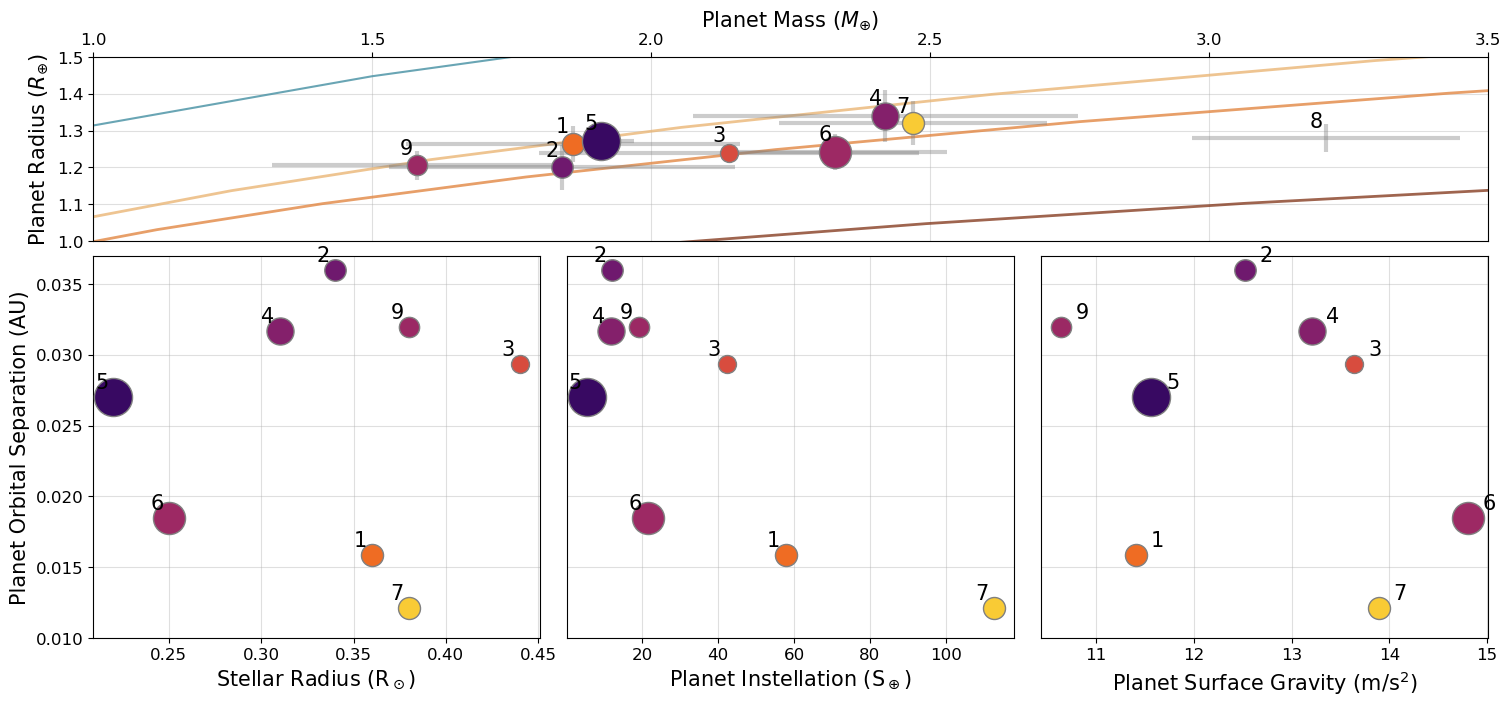

In [23]:
# Context Figures
%matplotlib inline
cmap = mpl.cm.inferno
norm = mpl.colors.Normalize(vmin=300, vmax=1000)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

fig = plt.figure(figsize=(15,7))
gs = gridspec.GridSpec(3, 3, left=0.06, right=0.99, bottom=0.09, top=0.92, hspace=0.08, wspace=0.06)

figure = {}
figure['MR'] = fig.add_subplot(gs[0,0:])
figure[1] = fig.add_subplot(gs[1:,0])
figure[2] = fig.add_subplot(gs[1:,1])
figure[3] = fig.add_subplot(gs[1:,2])

############### MR Diagram #######################################################################
Fe100 = ascii.read('/home/hannah/Research/Library/ZengCompositions/Fe_100.txt')
figure['MR'].plot(Fe100['col1'], Fe100['col2'], color='#873e23', lw=2, alpha=0.8)

Earthlike = ascii.read('/home/hannah/Research/Library/ZengCompositions/Fe_32p5_MgSiO3_67p5_Earth.txt')
figure['MR'].plot(Earthlike['col1'], Earthlike['col2'], color='#e28743', lw=2, alpha=0.8)

MgSiO3 = ascii.read('/home/hannah/Research/Library/ZengCompositions/MgSiO3_100.txt')
figure['MR'].plot(MgSiO3['col1'], MgSiO3['col2'], color='#eab676', lw=2, alpha=0.8)

MgSiO3_50_H2O_50 = ascii.read('/home/hannah/Research/Library/ZengCompositions/MgSiO3_50_H2O_50.txt')
figure['MR'].plot(MgSiO3_50_H2O_50['col1'], MgSiO3_50_H2O_50['col2'], color='#448fa2', lw=1.5, alpha=0.8)

figure['MR'].errorbar(HotRocksTargets['pl_bmasse'], 
             HotRocksTargets['pl_rade'], 
             xerr=np.mean([HotRocksTargets['pl_bmasseerr1'], abs(HotRocksTargets['pl_bmasseerr2'])], axis=0), 
             yerr=np.mean([HotRocksTargets['pl_radeerr1'], abs(HotRocksTargets['pl_radeerr2'])], axis=0),
             fmt='.',
             markersize=0,
             color='grey',
             ecolor='grey',
             elinewidth=3,
             alpha=0.4,
             zorder=500,
             )

#figure['MR'].errorbar(sample['pl_bmasse'], 
#             sample['pl_rade'], 
#             xerr=np.mean([sample['pl_bmasseerr1'], abs(sample['pl_bmasseerr2'])], axis=0), 
#             yerr=np.mean([sample['pl_radeerr1'], abs(sample['pl_radeerr2'])], axis=0),
#             fmt='.',
#             color='grey',
#             ecolor='grey',
#             elinewidth=3,
#             alpha=0.8,
#             zorder=500,
#             )

for i in range(len(HotRocksTargets)):
    figure['MR'].plot(HotRocksTargets['pl_bmasse'][i],
             HotRocksTargets['pl_rade'][i], 
             'o',
             markersize=HotRocksTargets['pl_ratror'][i]*5e2,
             markeredgecolor='grey',
             color=mapper.to_rgba(HotRocksTargets['pl_teq_a0'][i]),
             alpha=1,
             zorder=1000
            )
    figure['MR'].text(HotRocksTargets['pl_bmasse'][i]-0.03,
                      HotRocksTargets['pl_rade'][i]+0.03, 
                     #sample['pl_name'][i],
                      i+1,
                      fontsize=15,
                      zorder=2000)
#figure['MR'].colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),  orientation='horizontal',
#             fraction=0.08, pad=0.02, aspect=12
#            ).set_label(label='Planet $T_\mathrm{eq}$ (K)', size=14)

figure['MR'].set_ylim(1, 1.5) # radius
figure['MR'].set_xlim(1, 3.5) # mass

#plt.xscale('log')
#massrad['massrad'].set_yscale('log')
figure['MR'].set_xlabel('Planet Mass ($M_{\oplus}$)', fontsize=15)
figure['MR'].set_ylabel('Planet Radius ($R_{\oplus}$)', fontsize=15)
#plt.title('', fontsize=16)

figure['MR'].tick_params(axis='both', labelsize=12, labeltop=True, top=True, labelbottom=False, bottom=False)
figure['MR'].tick_params(axis='both', which='minor')#, labelbottom=False)
figure['MR'].grid(axis='both', which='both', alpha=0.4)
figure['MR'].xaxis.set_label_position('top') # <-- This doesn't work!

figure['MR'].tick_params(axis='x', which='minor')


############### 1: orbit vs star rad #######################################################################

def make_context_fig_gridspec(place, sample, x_string, y_string, x_label, y_label, savefig=False):
    
    for i in range(len(sample)):
        
        figure[place].plot(sample[x_string][i], 
                 sample[y_string][i], 
                 'o',
                 markersize=sample['pl_ratror'][i]*5e2,
                 markeredgecolor='grey',
                 color=mapper.to_rgba(sample['pl_teq_a0'][i]),
                 alpha=1.0,
                 zorder=500,
                 )
        
        shifty = 0.0006
        if place==1: shiftx = -0.01
        elif place==2: shiftx =-5
        elif place==3: shiftx = 0.15
        else: shiftx = 0
        figure[place].text(sample[x_string][i]+shiftx,
                           sample[y_string][i]+shifty, 
                           i+1, fontsize=15,
                           zorder=2000)

    #plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', fraction=0.08, pad=0.02, aspect=12).set_label(label='Planet Equilibrium Temperature (K)', size=14)

    figure[place].set_xlabel(x_label, fontsize=15)
    if place==1: figure[place].set_ylabel(y_label, fontsize=15)
    else: figure[place].tick_params(axis='y', labelleft=False, left=False)
    #plt.title('', fontsize=16)

    figure[place].tick_params(axis='both', labelsize=12)
    figure[place].tick_params(axis='both', which='minor')#, labelbottom=False)
    figure[place].grid(axis='both', which='both', alpha=0.4)

    figure[place].set_ylim(0.01, 0.037)
    
make_context_fig_gridspec(1, HotRocksTargets, 'st_rad', 'pl_orbsmax',
                         'Stellar Radius (R$_\odot$)', 'Planet Orbital Separation (AU)')

make_context_fig_gridspec(2, HotRocksTargets, 'pl_s', 'pl_orbsmax',
                         'Planet Instellation (S$_\oplus$)', 'Planet Orbital Separation (AU)')

make_context_fig_gridspec(3, HotRocksTargets, 'pl_g', 'pl_orbsmax',
                         'Planet Surface Gravity (m/s$^2$)', 'Planet Orbital Separation (AU)')


plt.savefig('../Figure_Sample_in_Context.png', facecolor='white', dpi=200)

### Cosmic shoreline

In [100]:
Ixuv_shoreline = (((1*u.AU) / (HotRocksTargets['pl_orbsmax']))**2 * (10**np.array(HotRocksTargets['st_lum']))**0.4).decompose()
Ixuv_shoreline

<Quantity [ 738.16288603,  147.297372  ,  308.58575489,  165.4556018 ,
            147.66326662,  405.69164733, 1327.12464353,           nan,
            202.16907659]>

In [101]:
# escape velocity
v_esc = np.sqrt(2 * const.G * np.array(HotRocksTargets['pl_bmasse'])*u.M_earth / (np.array(HotRocksTargets['pl_rade'])*u.R_earth))
v_esc = v_esc.to(u.km/u.s)

<function matplotlib.pyplot.xlim(*args, **kwargs) -> 'tuple[float, float]'>

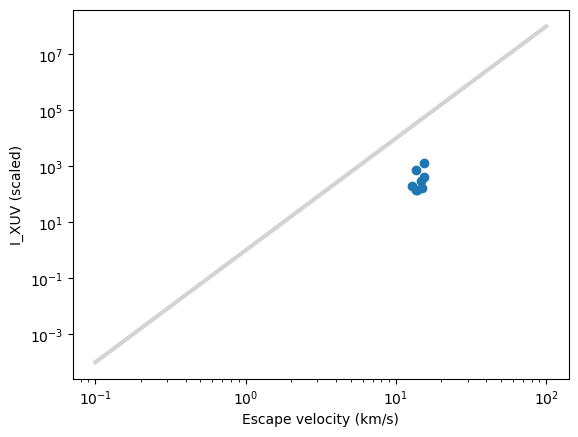

In [102]:
plt.plot(np.logspace(-1, 2, 100), np.logspace(-1, 2, 100)**4, color='darkgrey', lw=3, alpha=0.5)
plt.plot(v_esc, Ixuv_shoreline,  'o')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Escape velocity (km/s)')
plt.ylabel('I_XUV (scaled)')

plt.xlim

In [42]:
HotRocksTargets['st_lum']

masked_array(data=[0.01499685, 0.01592209, 0.03630781, 0.01127197,
                   0.00380189, 0.00714496, 0.01671091, 0.01595879,
                   0.01940886],
             mask=False,
       fill_value=1e+20)

In [49]:
((1*u.AU) / (HotRocksTargets['pl_orbsmax']))**2

<Quantity [3960.5199529 ,  771.60493827, 1162.45426178,  995.13379574,
           1371.74211248, 2928.16851258, 6818.85905487,           nan,
            978.39613283] AU2 / AU2>

In [48]:
(HotRocksTargets['pl_orbsmax'])

0.01589
0.036
0.02933
0.0317
0.027
0.01848
0.01211
--
0.03197
